In [1]:
import sys
import os
import inspect

In [2]:
this_folder = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
root_folder = os.path.dirname(os.path.dirname(this_folder))

In [3]:
sys.path.append(root_folder + '\\capstone-project\\src\\otm')
from otm_env import *
sys.path.append(root_folder + '\\capstone-project\\src\\agents')
from tab_q_learning import *
from matplotlib import pyplot as plt
import os
import inspect
from tqdm import tqdm

In [4]:
env_init_info = {
    "time_step": 60,
    "plot_precision": 2,
    "num_states": 2,
    "num_actions": 2,
    "buffer": True

}


configfile = 'network_1.xml'

env = otmEnvDiscrete(env_init_info, configfile)

agent_init_info = {
            "num_states": env_init_info["num_states"]**(env.num_intersections*2),
            "num_actions": env_init_info["num_actions"]**env.num_intersections,
            "epsilon": 0.5,
            "step_size": 0.1,
            "discount": 0.9,
            "seed": 0
            }

agent = QLearningAgent()
agent.agent_init(agent_init_info)

 20%|█▉        | 998/5000 [01:47<07:10,  9.30it/s]

Time-step: 1000/5000


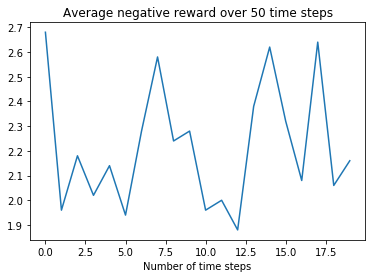

 40%|███▉      | 1999/5000 [03:44<05:42,  8.76it/s]

Time-step: 2000/5000


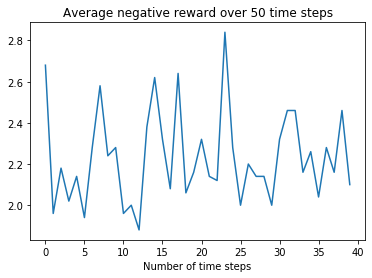

 60%|█████▉    | 2999/5000 [05:43<03:51,  8.65it/s]

Time-step: 3000/5000


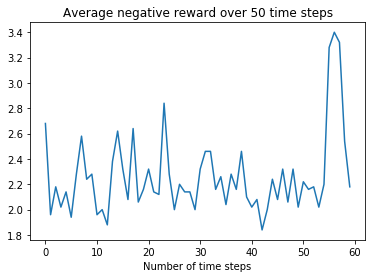

 80%|███████▉  | 3999/5000 [07:30<01:46,  9.42it/s]

Time-step: 4000/5000


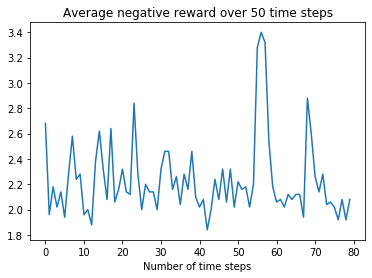

100%|█████████▉| 4999/5000 [09:19<00:00,  9.07it/s]

Time-step: 5000/5000


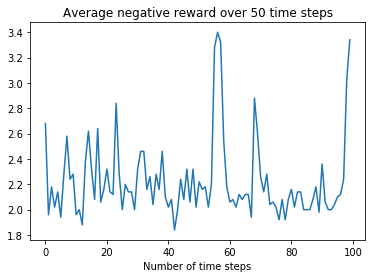

100%|██████████| 5000/5000 [09:19<00:00,  8.93it/s]


In [5]:
acc_neg_reward = [] # Contains negative sum of rewards during episode
num_steps = 5000   # The number of steps to run the simulation
reward_sum = 0

state, _ = env.reset()
action = agent.agent_start(state)
    
for i in tqdm(range(num_steps)):
    
    state, reward = env.step(action)
    action = agent.agent_step(reward, state)
    
    reward_sum += reward
    
    if (i+1) % 50 == 0:
        acc_neg_reward.append(-reward_sum/50)
        reward_sum = 0
    
    if (i+1) % 1000 == 0:
        print("Time-step: " + str(i+1) + "/" + str(num_steps))
        plt.plot(range(len(acc_neg_reward)), acc_neg_reward)
        plt.xlabel("Number of time steps")
        plt.title("Average negative reward over 50 time steps")
        plt.show()

In [6]:
agent.q

array([[  0.        ,  -0.4       ,   0.        ,   0.        ],
       [  0.        ,  -0.209     ,  -2.51630905,  -0.28      ],
       [ -7.80248815,  -7.44474548,  -7.3067626 ,  -6.18397022],
       [ -1.53257595,  -1.65325637,  -4.48763921,  -0.59402   ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [ -9.25893716,  -7.77024917, -10.03921142,  -8.69946197],
       [ -5.00929298,  -3.57916647,  -4.09327164,  -3.11493408],
       [ -9.32162568, -10.45031474,  -8.72856724,  -8.64880621],
       [-13.07179114, -12.51007965, -11.35265011,  -8.6393866 ],
       [-16.04590322, -15.83782516, -15.99691311, -15.5066282 ],
       [-15.51514832, -15.65916145, -15.84923049, -15.24988511],
       [ -2.40585598,  -1.41513477,  -1.94701046,  -0.2       ],
       [ -1.74872938,  -2.08954049,  -1.73158406,  -1.2958073 ],
       [-14.9935145 , -15.30677487, -14.67965388, -14.16700135],
       [-13.16704245, -13

Text(0.5, 1.0, 'Average negative reward over 50 time steps')

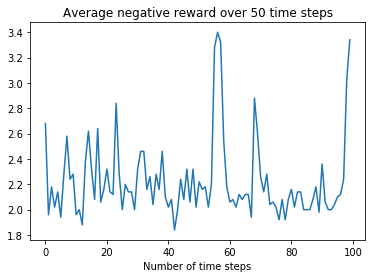

In [7]:
plt.plot(range(len(acc_neg_reward)), acc_neg_reward)
plt.xlabel("Number of time steps")
plt.title("Average negative reward over 50 time steps")

In [8]:
def argmax(q_values):
    """argmax with random tie-breaking
    Args:
        q_values (Numpy array): the array of action-values
    Returns:
        action (int): an action with the highest value
    """
    top = float("-inf")
    ties = []

    for i in range(len(q_values)):
        if q_values[i] > top:
            top = q_values[i]
            ties = []

        if q_values[i] == top:
            ties.append(i)

    return np.random.RandomState(0).choice(ties)

In [9]:
del env
env2 = otmEnvDiscrete(env_init_info, configfile)

In [10]:
state = env2.reset("current")
reward_sum = 0

for i in range(60):

    action = argmax(agent.q[state])
    state, reward = env2.step(action)
    reward_sum += reward
    
print(reward_sum/60)

-1.0666666666666667


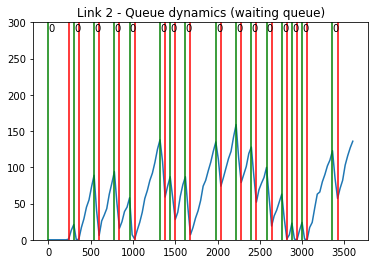

In [11]:
env2.plot_queues(2, "waiting")

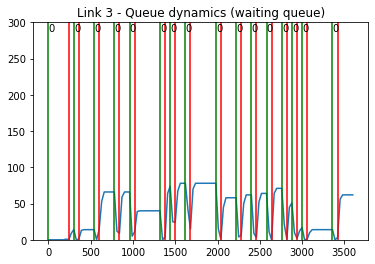

In [12]:
env2.plot_queues(3, "waiting")

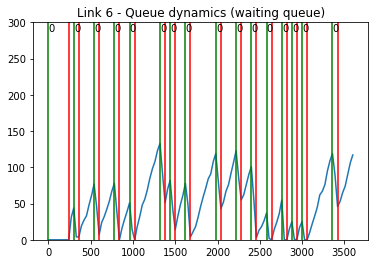

In [13]:
env2.plot_queues(6, "waiting")

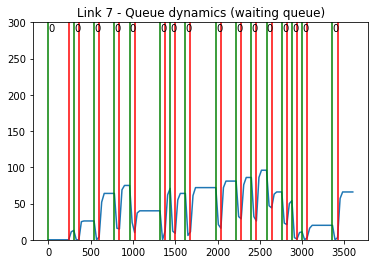

In [14]:
env2.plot_queues(7, "waiting")

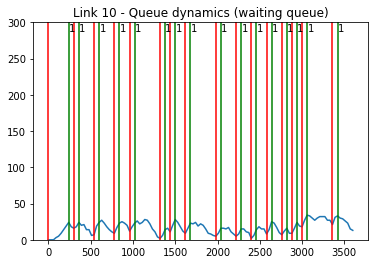

In [15]:
env2.plot_queues(10, "waiting")

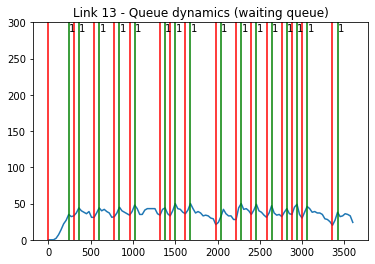

In [16]:
env2.plot_queues(13, "waiting")

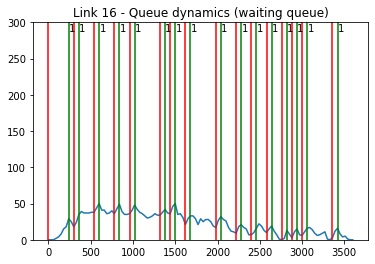

In [17]:
env2.plot_queues(16, "waiting")

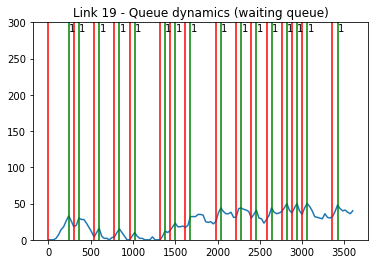

In [18]:
env2.plot_queues(19, "waiting")

In [19]:
env2.otm4rl.get_queues()

{1: {'waiting': 0, 'transit': 12},
 2: {'waiting': 136, 'transit': 17},
 3: {'waiting': 62, 'transit': 0},
 4: {'waiting': 0, 'transit': 0},
 5: {'waiting': 0, 'transit': 14},
 6: {'waiting': 117, 'transit': 19},
 7: {'waiting': 66, 'transit': 0},
 8: {'waiting': 0, 'transit': 0},
 9: {'waiting': 1, 'transit': 9},
 10: {'waiting': 13, 'transit': 8},
 11: {'waiting': 12, 'transit': 7},
 12: {'waiting': 0, 'transit': 8},
 13: {'waiting': 24, 'transit': 13},
 14: {'waiting': 6, 'transit': 11},
 15: {'waiting': 3, 'transit': 7},
 16: {'waiting': 0, 'transit': 6},
 17: {'waiting': 3, 'transit': 4},
 18: {'waiting': 0, 'transit': 7},
 19: {'waiting': 40, 'transit': 10},
 20: {'waiting': 4, 'transit': 6}}

In [20]:
del env2